In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [3]:
data = pd.read_csv('D:\crop_production_analysis\data\Crop Production data-Final-csv.csv')

In [4]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Region
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Islands
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Islands
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Islands
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Islands
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Islands


In [5]:
data.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

#### Information about the dataset

* This dataset is about the crop production data from year 1997-2015.
* The dataset contains columns:
    * State_Name: name of the state
    * District_Name: name of the district
    * Crop_Year: year of crop production
    * Season: The season during which the crop is cultivated (e.g., Kharif, Rabi, Whole Year).
    * Crop: name of crop 
    * Area: agricultural land(hectares)
    * Production: Crop Production(metric tons)
    * Region: name of the region (The geographical region where the state is located e.g., Islands, North, South)


In [6]:
data.shape

(246091, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
 7   Region         246091 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.0+ MB


In [8]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460910e+05
mean,2005.643018,1.200282e+04,5.814033e+05
std,4.952164,5.052340e+04,1.695015e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,9.100000e+01
50%,2006.000000,5.820000e+02,7.710000e+02
75%,2010.000000,4.392000e+03,7.100000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [9]:
data[['Crop_Year','Area','Production']].median()

Crop_Year     2006.0
Area           582.0
Production     771.0
dtype: float64

In [10]:
data.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
Region            object
dtype: object

The dataset contains 246091 rows and 8 columns. <br>
There are 5 categorical and 3 numerical columns. <br>
Area and Production column contains outliers as there is difference between the mean and median.

In [11]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
Region           0
dtype: int64

In [12]:
data['State_Name'].value_counts()

State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                    

In [13]:
data[data['State_Name'].isnull()]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Region


In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,246091.0,2005.643018,4.952164e+00,1997.00,2002.0,2006.0,2010.0,2.015000e+03
Area,246091.0,12002.820864,5.052340e+04,0.04,80.0,582.0,4392.0,8.580100e+06
Production,246091.0,581403.313056,1.695015e+07,0.00,91.0,771.0,7100.0,1.250800e+09


By looking at the difference between the mean and median we can conclute that the data has outlier <br>
we will remove outlier one by one

we will first detect outlier and separate outlier<br>
we will create new dataframe with minimum outlier

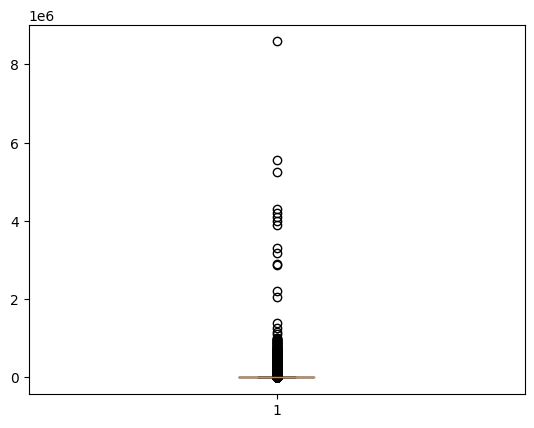

In [15]:
box_plot=plt.boxplot(data['Area'])
plt.show()

In [16]:
[i.get_ydata() for i in box_plot['caps']]

[array([0.04, 0.04]), array([10860., 10860.])]

The lower whisker is 0.04 and upper whisker is 10860. <br>
hence the data above 10860 and below 0.04 are outliers in 'Area' column.

In [17]:
data1 = data[(data['Area']>0.04) & (data['Area']<10860)]

In [18]:
data1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Region
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Islands
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Islands
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Islands
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Islands
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Islands


##### Production <br><br>

we check the outlier of this column from new dataset i.e. data1

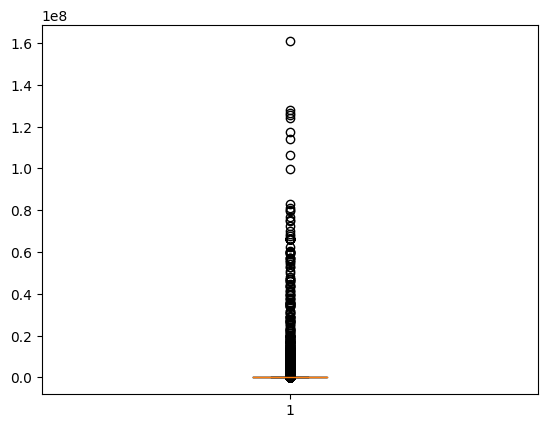

In [19]:
box_plot1=plt.boxplot(data1['Production'])

In [20]:
[i.get_ydata() for i in box_plot1['caps']]

[array([0., 0.]), array([5480., 5480.])]

In [21]:
data2 = data[(data['Area']>0) & (data['Area']<5480)]

In [22]:
data2.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Region
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Islands
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Islands
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Islands
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Islands
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Islands


In [23]:
data2.shape

(190144, 8)

In [24]:
data2.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
Region            object
dtype: object

In [25]:
data2['Crop_Year'].nunique()

19

##### Crop_Year column is a categorial column as it has only 19 unique values
##### so we have to change the data type into 'Object'

In [26]:
data2['Crop_Year']=data2['Crop_Year'].astype('object')

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\1988938592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Crop_Year']=data2['Crop_Year'].astype('object')


In [27]:
data2['Crop_Year'].dtype

dtype('O')

##### check for duplicate values

In [28]:
data2.duplicated().sum()

4

In [29]:
data2.drop_duplicates(inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\1579751556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop_duplicates(inplace=True)


In [30]:
data2.duplicated().sum()

0

##### checking the irrelevant column

In [31]:
num_data = data2.select_dtypes(np.number)

In [32]:
cat_data = data2.select_dtypes(object)

In [33]:
num_data.head()

,Area,Production
0,1254.0,2000.0
1,2.0,1.0
2,102.0,321.0
3,176.0,641.0
4,720.0,165.0


In [34]:
cat_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Region
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,Islands
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,Islands
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,Islands
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,Islands
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,Islands


C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\3518595165.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cat_data,x=i,palette='viridis')
C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\3518595165.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cat_data,x=i,palette='viridis')
C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\3518595165.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cat_data,x=i,palette='viridis')
C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\3518595165.py:7: FutureWarning: 

Passing `palette` witho

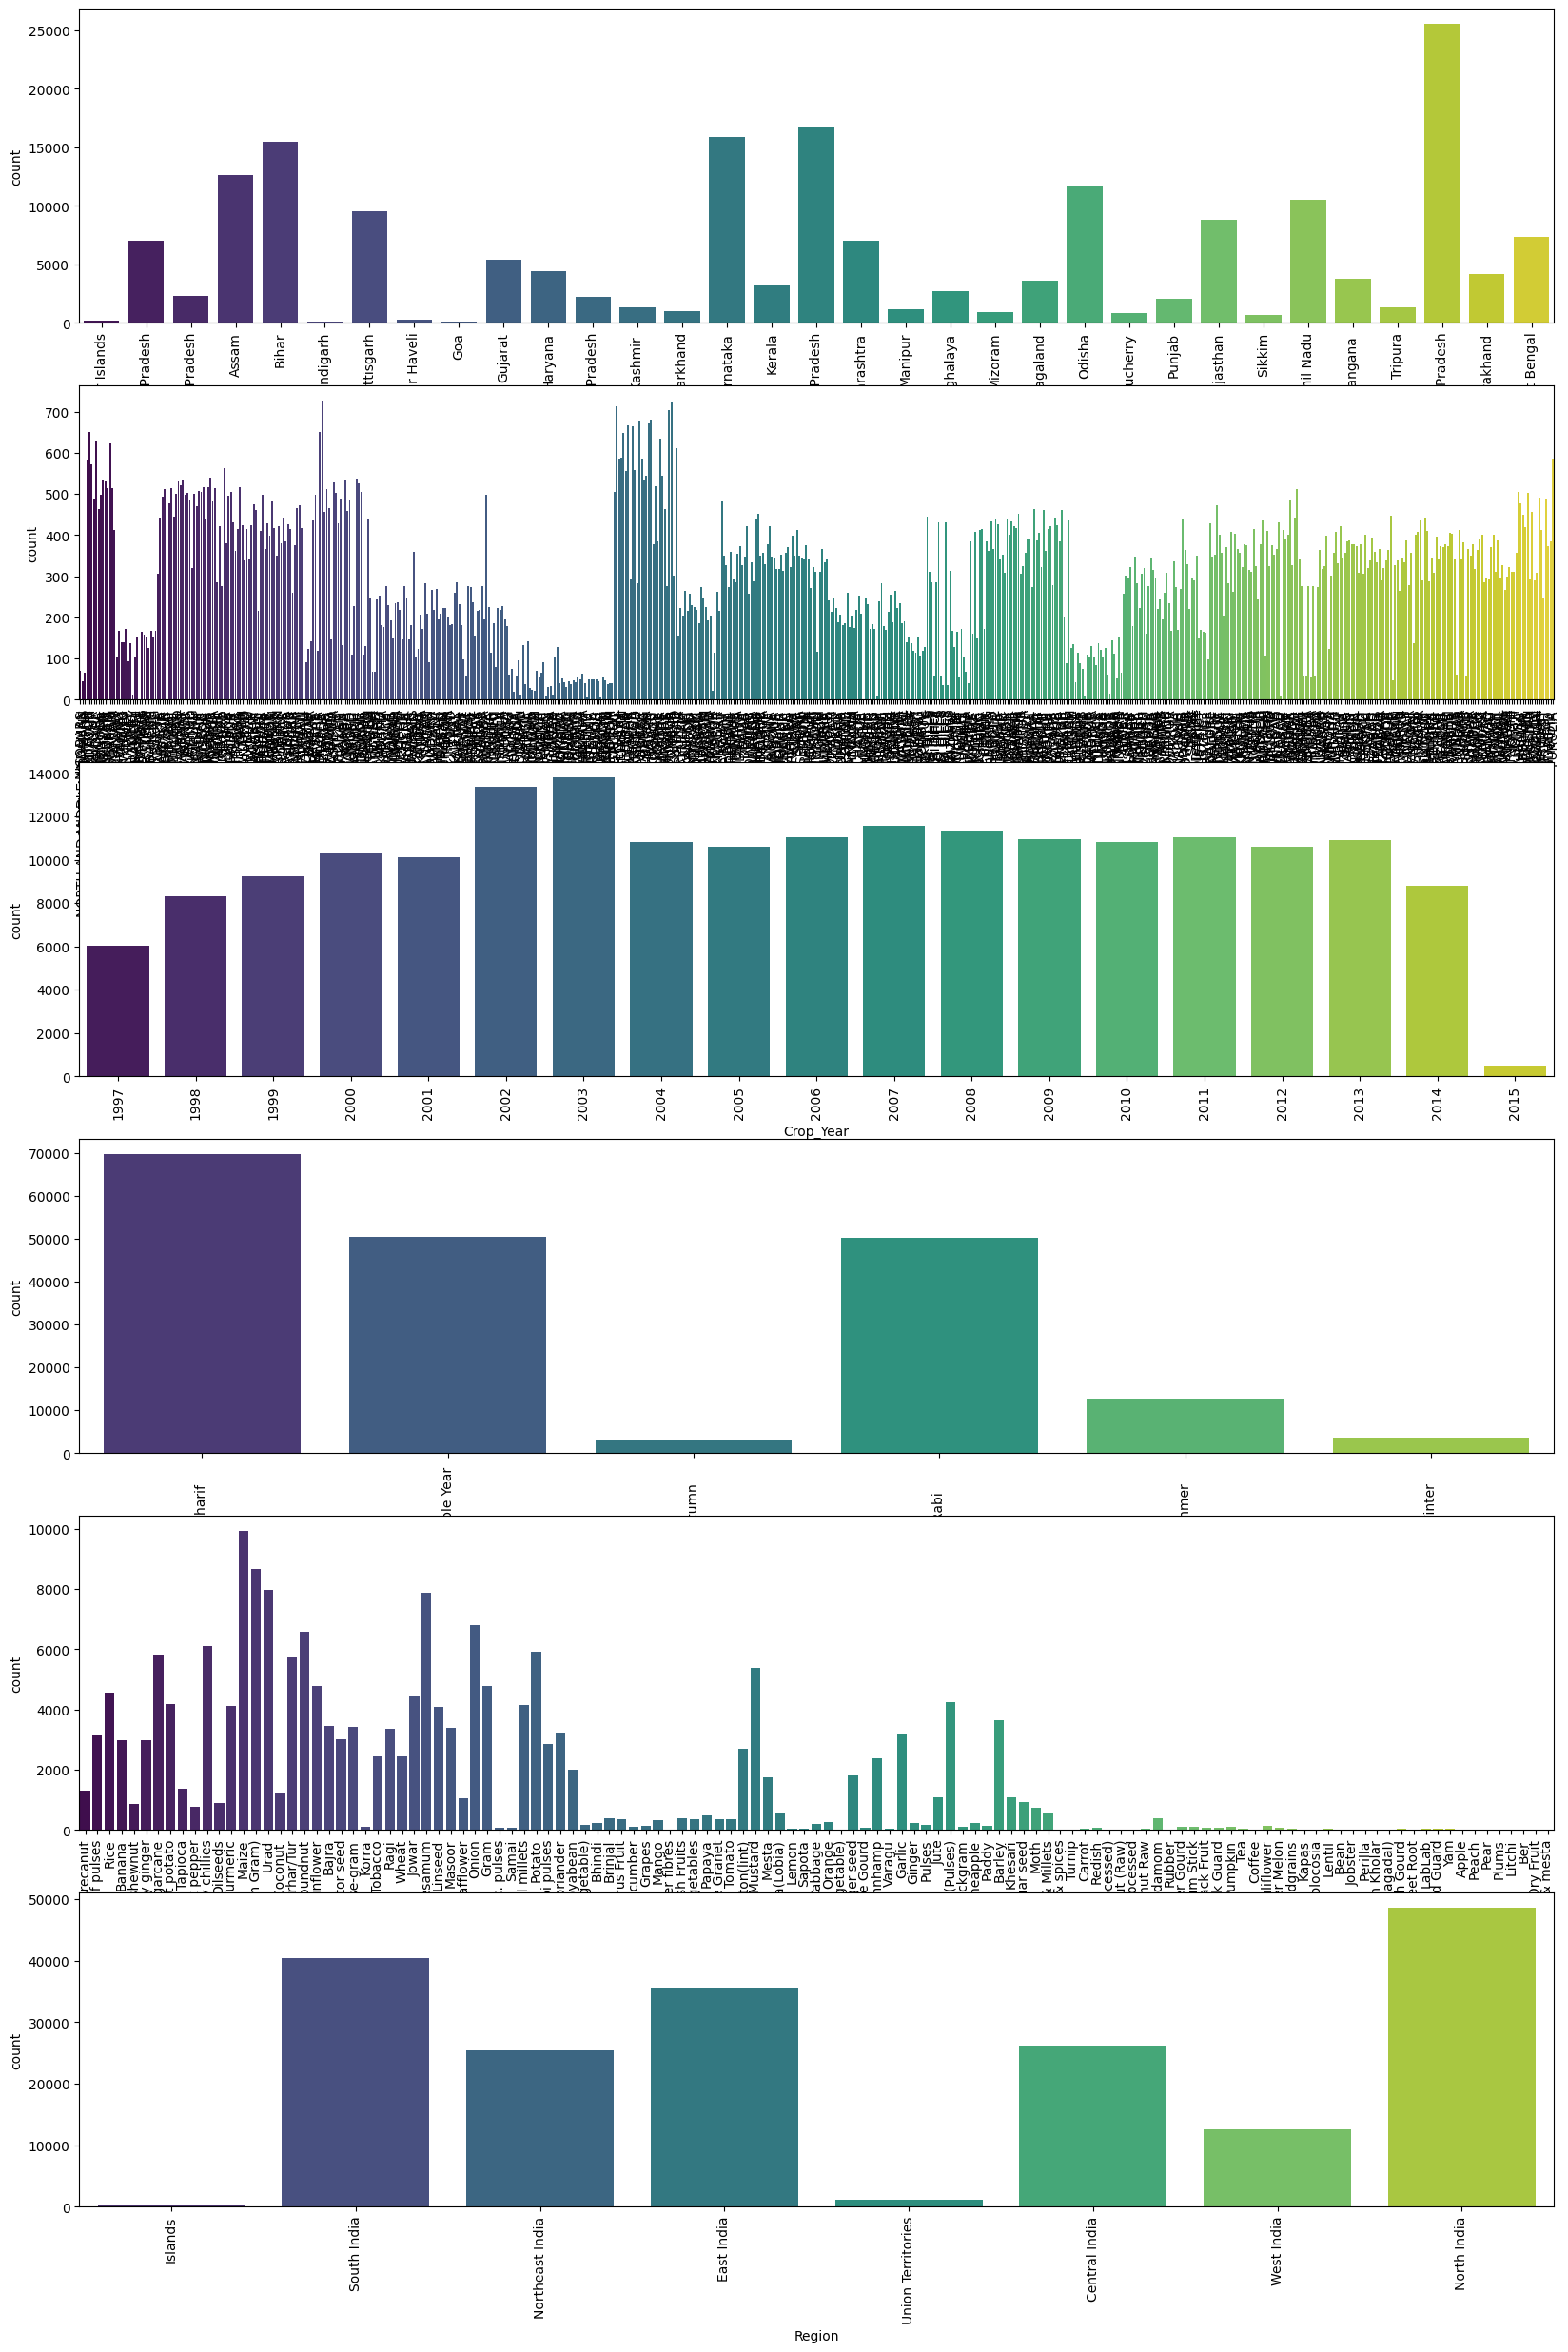

In [35]:
#categorical columns

plt.figure(figsize=(20,30))
count=1
for i in cat_data.columns:
    plt.subplot(6,1,count)
    sns.countplot(data=cat_data,x=i,palette='viridis')
    plt.xticks(rotation=90)
    count+=1
    
    

<Axes: xlabel='Production', ylabel='Count'>

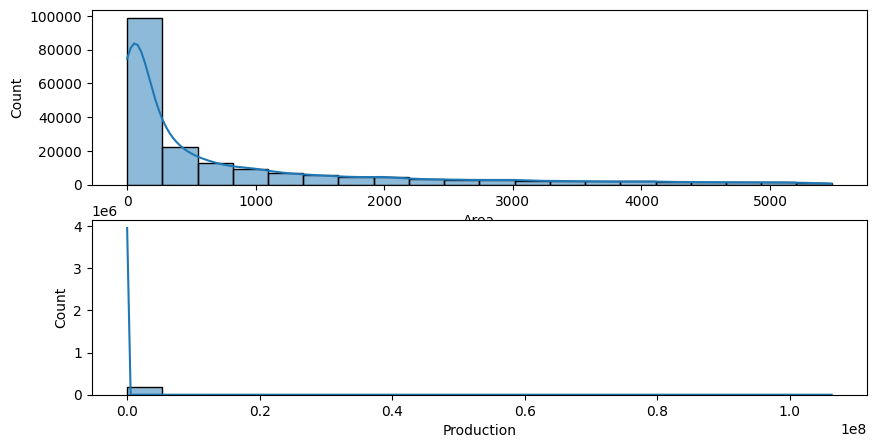

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
sns.histplot(data=num_data,x='Area',bins=20,kde=True)
plt.subplot(2,1,2)
sns.histplot(data=num_data,x='Production',bins=20,kde=True)

The numerical data is highly skewed even after removing the outlier but these two columns are important for the analysis<br>
In categorical data all the columns are important for analysis so we will not remove any column

##### Univariate Analysis

In [37]:
data2['State_Name'].value_counts()

State_Name
Uttar Pradesh                  25562
Madhya Pradesh                 16749
Karnataka                      15869
Bihar                          15506
Assam                          12674
Odisha                         11708
Tamil Nadu                     10553
Chhattisgarh                    9504
Rajasthan                       8828
West Bengal                     7349
Maharashtra                     7044
Andhra Pradesh                  7017
Gujarat                         5426
Haryana                         4446
Uttarakhand                     4166
Telangana                       3755
Nagaland                        3646
Kerala                          3169
Meghalaya                       2684
Arunachal Pradesh               2312
Himachal Pradesh                2217
Punjab                          2083
Tripura                         1328
Jammu and Kashmir               1307
Manipur                         1173
Jharkhand                       1014
Mizoram                    

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\1426890821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data2,x='State_Name',palette='viridis')


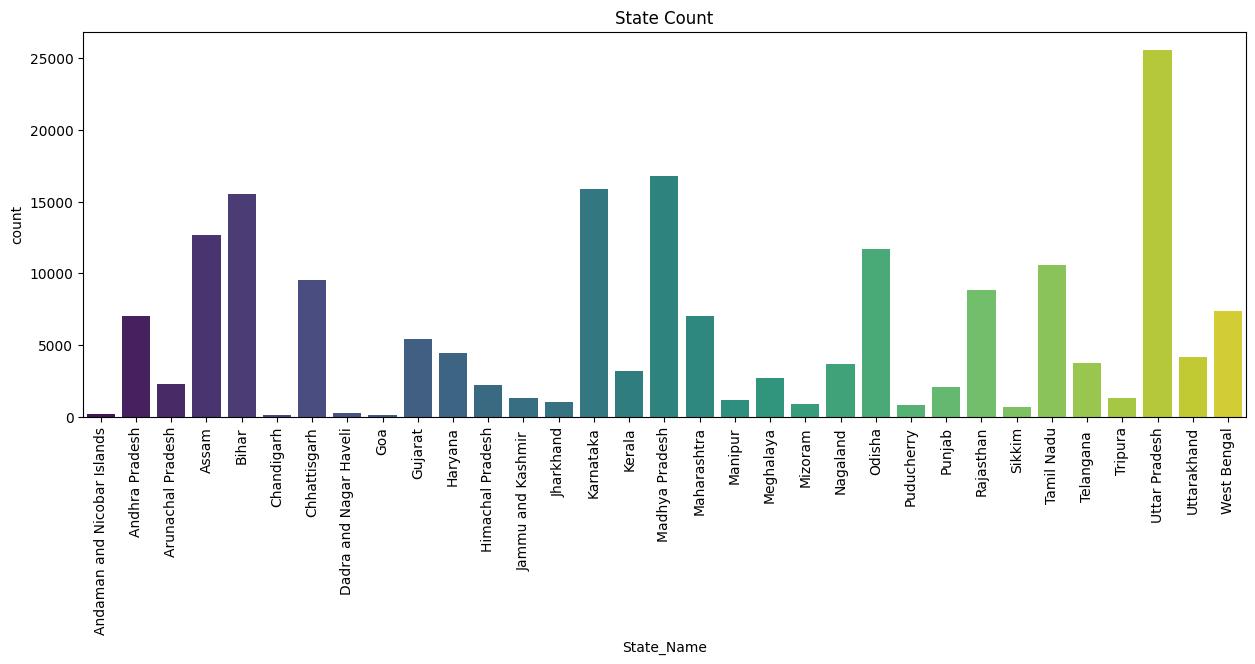

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(data=data2,x='State_Name',palette='viridis')

plt.title('State Count')
plt.xticks(rotation=90)
plt.show()

Uttar Pradesh and madhya pradesh as highest count.<br>
the count for goa and Chandigarh is lowest.

##### District Name

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\1591637372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data2,x='District_Name',palette='viridis')


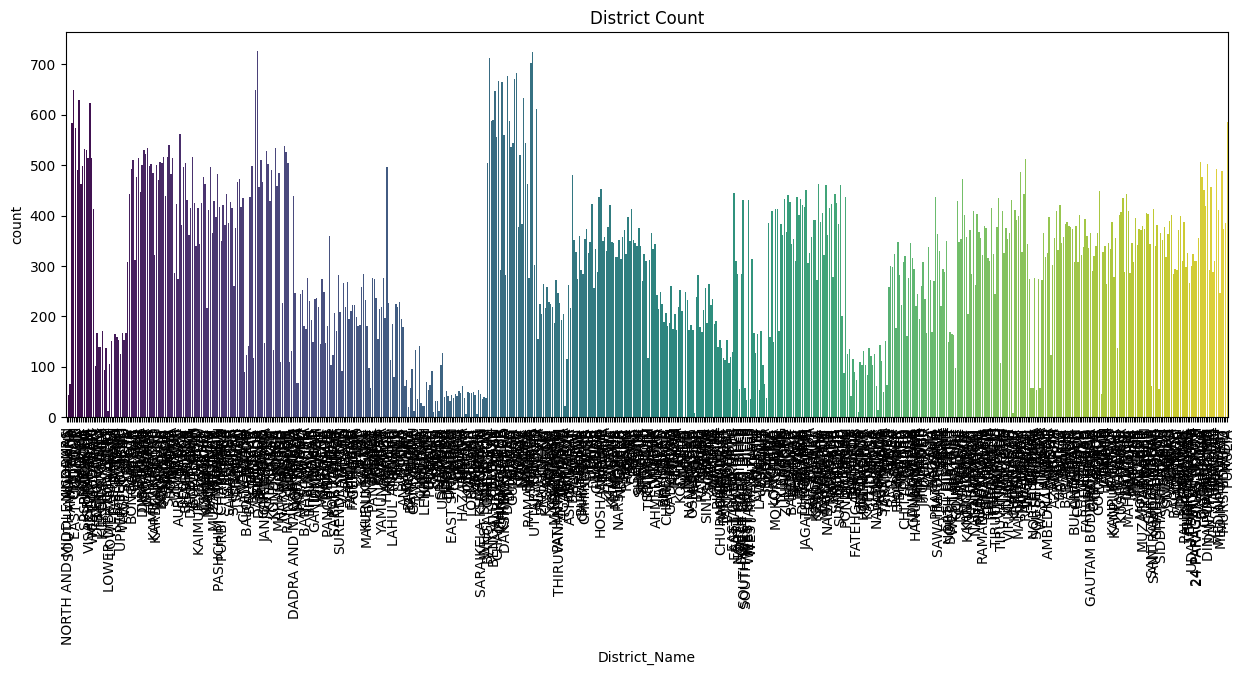

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(data=data2,x='District_Name',palette='viridis')

plt.title('District Count')
plt.xticks(rotation=90)
plt.show()

The above graph does not give any clear picture<br>
So, we will see top 10 and bottom 10 district count.

In [40]:
dist_count=data2['District_Name'].value_counts()

In [41]:
top10=dist_count[:11]

In [42]:
top10

District_Name
BILASPUR           727
TUMKUR             725
BANGALORE RURAL    713
SHIMOGA            703
HAVERI             682
DAVANGERE          676
HASSAN             671
CHAMARAJANAGAR     667
CHIKMAGALUR        664
CHITTOOR           650
BIJAPUR            650
Name: count, dtype: int64

In [43]:
bottom10=dist_count[-11:-1]

In [44]:
bottom10

District_Name
LONGDING     13
SHOPIAN      13
GANDERBAL    12
RAMBAN       11
FAZILKA      10
PALGHAR       9
HYDERABAD     8
KHUNTI        6
RAMGARH       6
MUMBAI        1
Name: count, dtype: int64

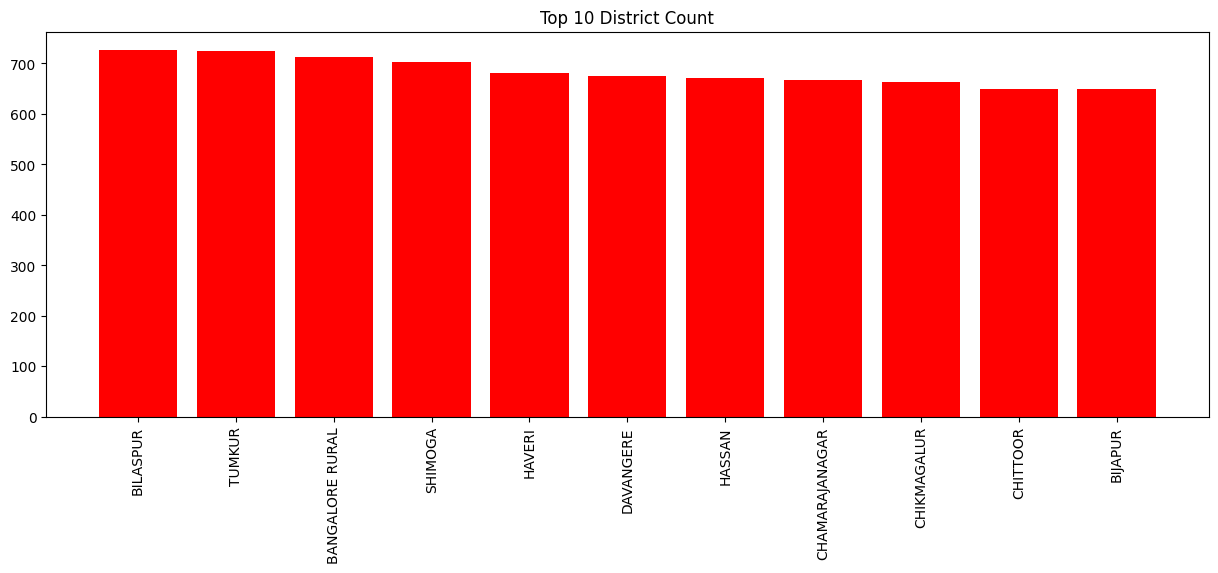

In [45]:
plt.figure(figsize=(15,5))
plt.bar(top10.keys(),top10.values,color='red')

plt.title('Top 10 District Count')
plt.xticks(rotation=90)
plt.show()

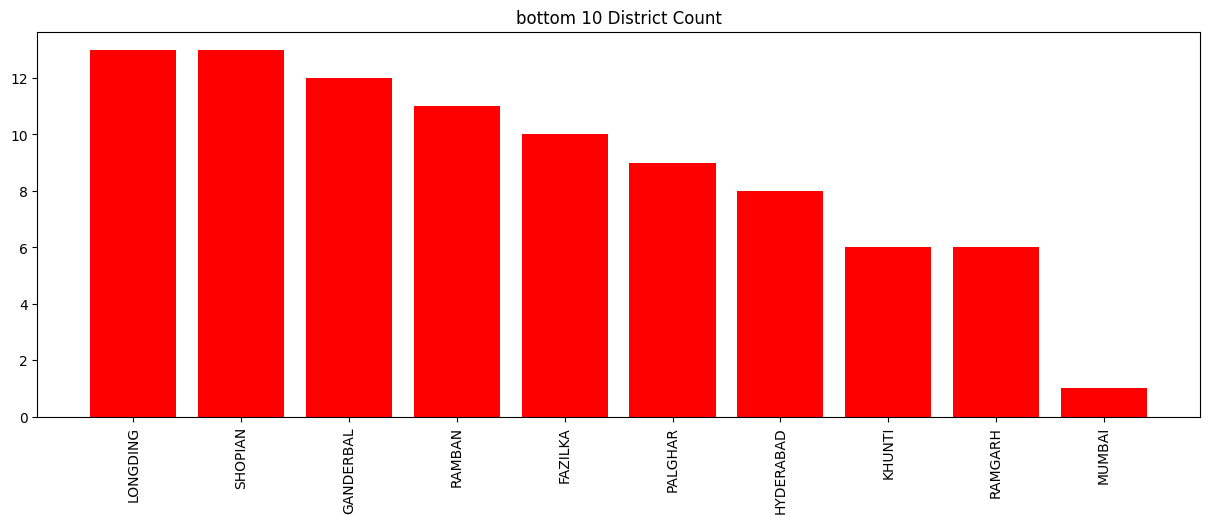

In [46]:
plt.figure(figsize=(15,5))
plt.bar(bottom10.keys(),bottom10.values,color='red')

plt.title('bottom 10 District Count')
plt.xticks(rotation=90)
plt.show()

##### Bilaspur has highest count i.e. it has highest crop production
##### Mumbai has lowest count i.e. it has lowest crop production

##### Crop_Year

In [47]:
data2['Crop_Year'].value_counts()

Crop_Year
2003    13801
2002    13371
2007    11545
2008    11335
2006    11039
2011    11030
2009    10970
2013    10916
2010    10823
2004    10820
2005    10606
2012    10595
2000    10301
2001    10135
1999     9229
2014     8784
1998     8334
1997     6024
2015      482
Name: count, dtype: int64

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\728090170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data2,x='Crop_Year',palette='viridis')


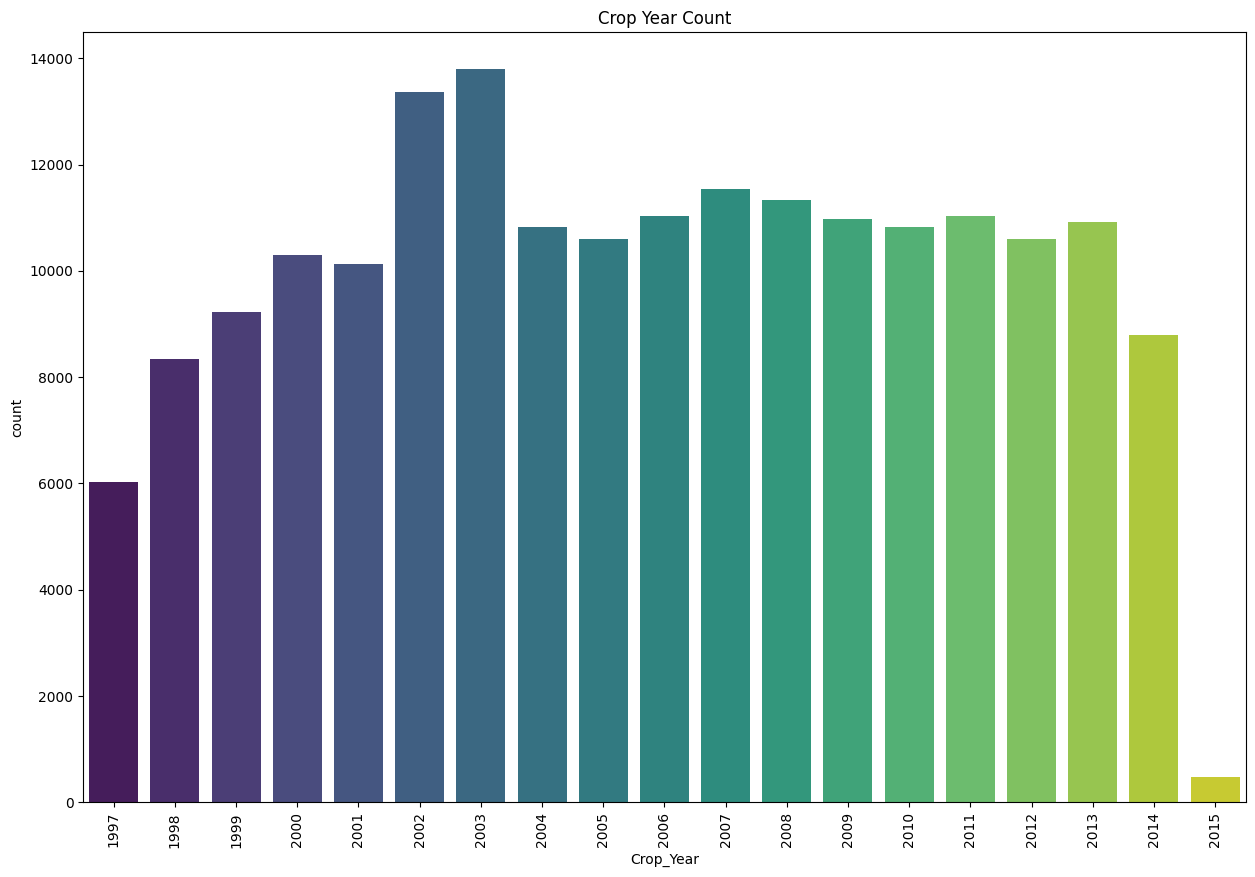

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(data=data2,x='Crop_Year',palette='viridis')

plt.title('Crop Year Count')
plt.xticks(rotation=90)
plt.show()

Year 2002 and 2003 has maximum count and year 2015 has lowest count.

##### Season

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\109559360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data2,x='Season',palette='viridis')


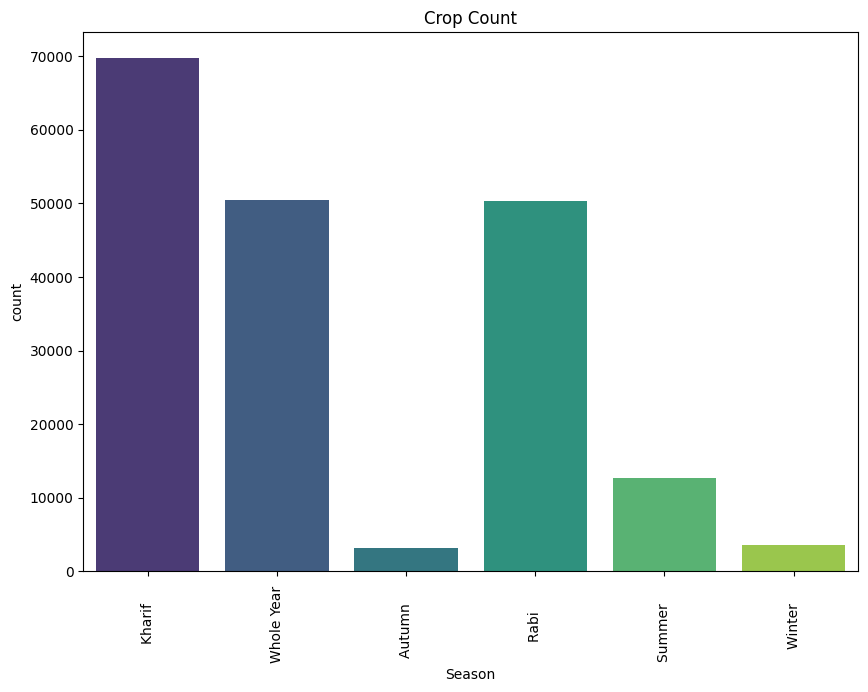

In [49]:
plt.figure(figsize=(10,7))
sns.countplot(data=data2,x='Season',palette='viridis')

plt.title('Crop Count')
plt.xticks(rotation=90)
plt.show()

Kharif season has highest count and Autumn season has lowest count.

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\4194974864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data2,x='Crop',palette='viridis')


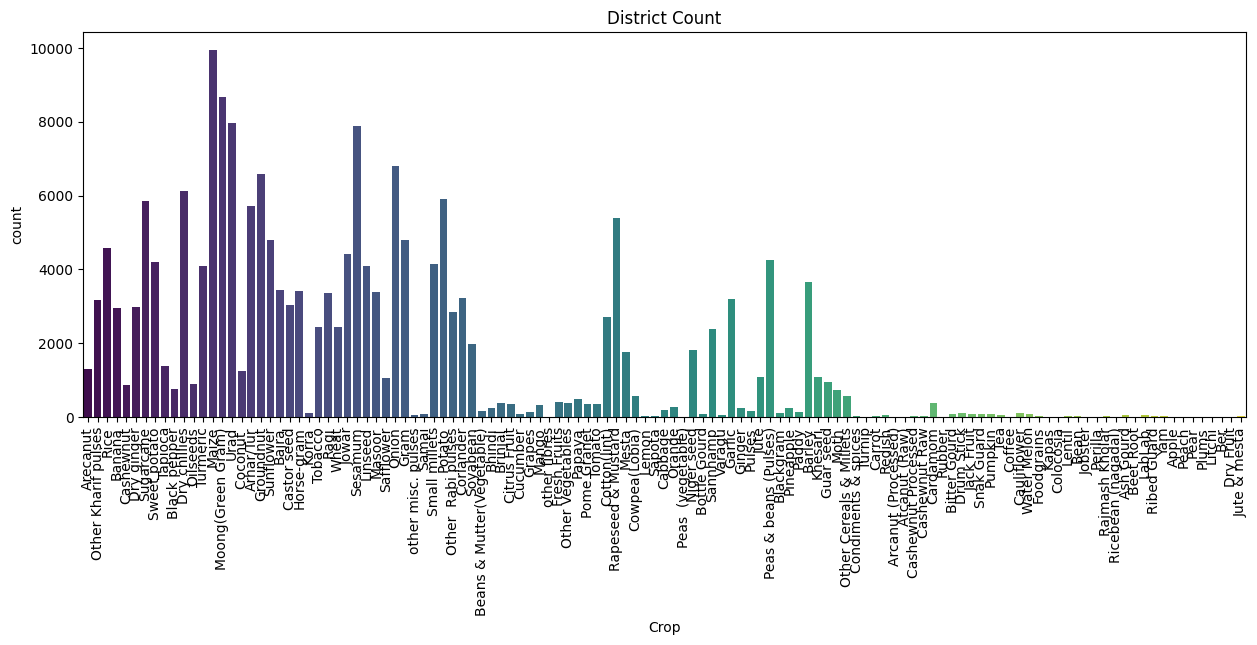

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(data=data2,x='Crop',palette='viridis')

plt.title('District Count')
plt.xticks(rotation=90)
plt.show()

Here also to get clear picture we will find top 10 and bottom 10 crop count

In [51]:
top10=data2['Crop'].value_counts()[:11]
bottom10=data2['Crop'].value_counts()[-11:-1]

In [52]:
top10

Crop
Maize                 9931
Moong(Green Gram)     8679
Urad                  7979
Sesamum               7880
Onion                 6789
Groundnut             6579
Dry chillies          6118
Potato                5916
Sugarcane             5840
Arhar/Tur             5715
Rapeseed & Mustard    5386
Name: count, dtype: int64

In [53]:
bottom10

Crop
Perilla    9
Jobster    9
Turnip     8
Pear       6
Plums      6
Litchi     6
Apple      4
Peach      4
Rubber     3
Coffee     2
Name: count, dtype: int64

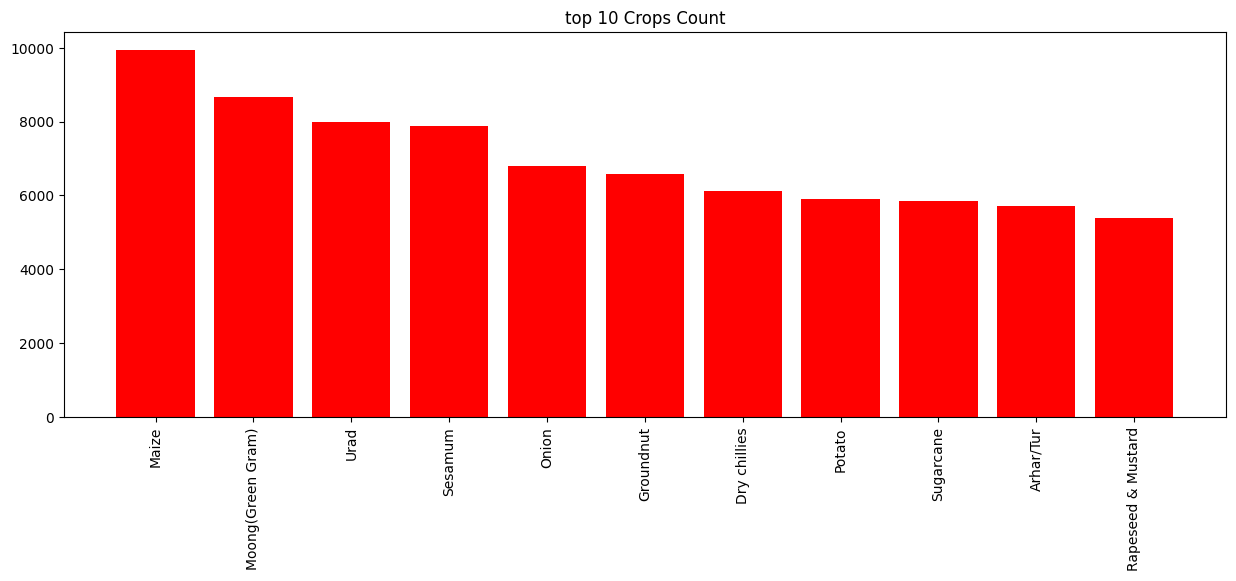

In [54]:
plt.figure(figsize=(15,5))
plt.bar(top10.keys(),top10.values,color='red')

plt.title('top 10 Crops Count')
plt.xticks(rotation=90)
plt.show()

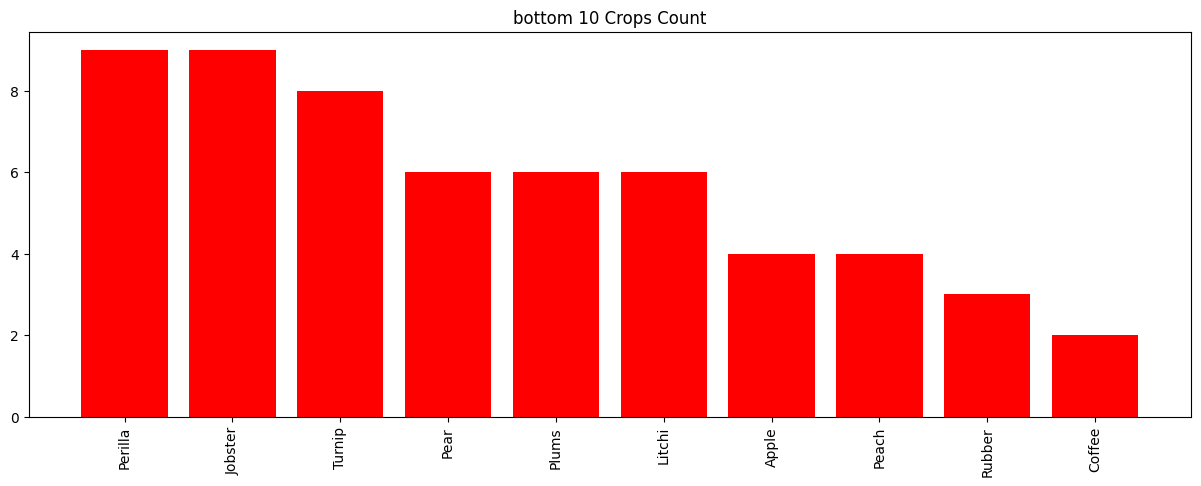

In [55]:
plt.figure(figsize=(15,5))
plt.bar(bottom10.keys(),bottom10.values,color='red')

plt.title('bottom 10 Crops Count')
plt.xticks(rotation=90)
plt.show()

Maize has the maximum count and coffee has the minimum count.

In [56]:
data2.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Region
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Islands
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Islands
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Islands
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Islands
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Islands


<Axes: xlabel='Area', ylabel='Count'>

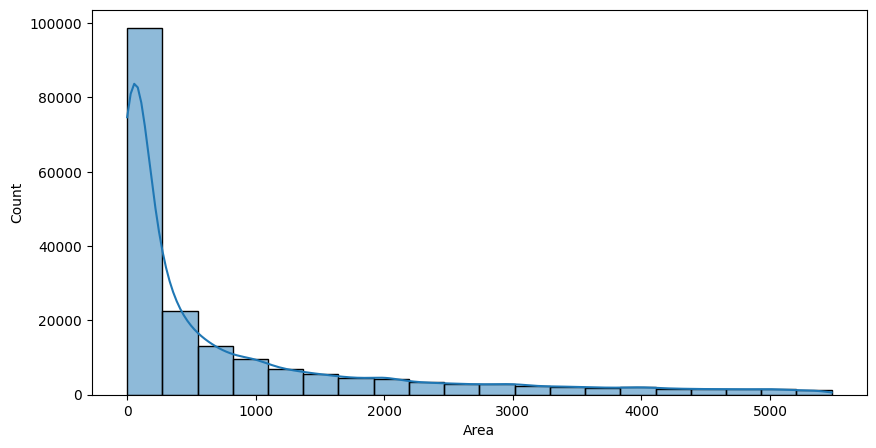

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(data=data2,x='Area',bins=20,kde=True)

<Axes: xlabel='Production', ylabel='Count'>

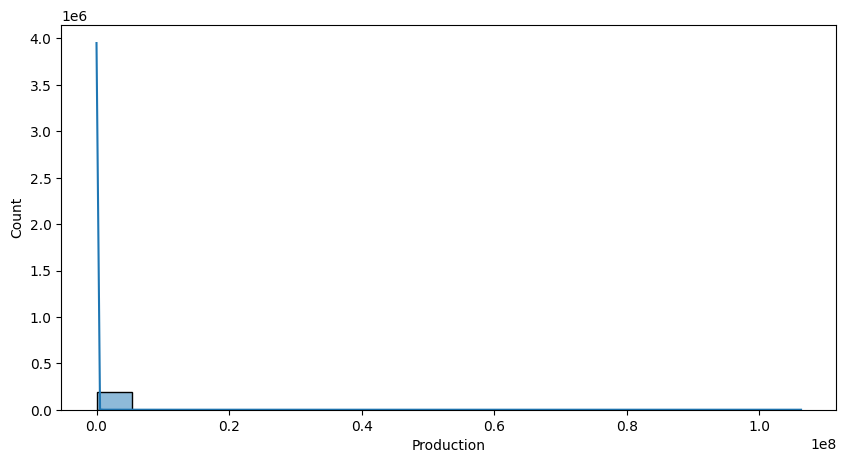

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(data=data2,x='Production',bins=20,kde=True)

The data is highly skewed and it is maybe because that every state has varying number of agricultural lands<br>
every state produces different crops in abundance.

#### Bivariate Analysis

In [59]:
data2.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Region
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Islands
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Islands
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Islands
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Islands
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Islands


C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\3367220708.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2,x='State_Name',y='Area',palette='viridis')


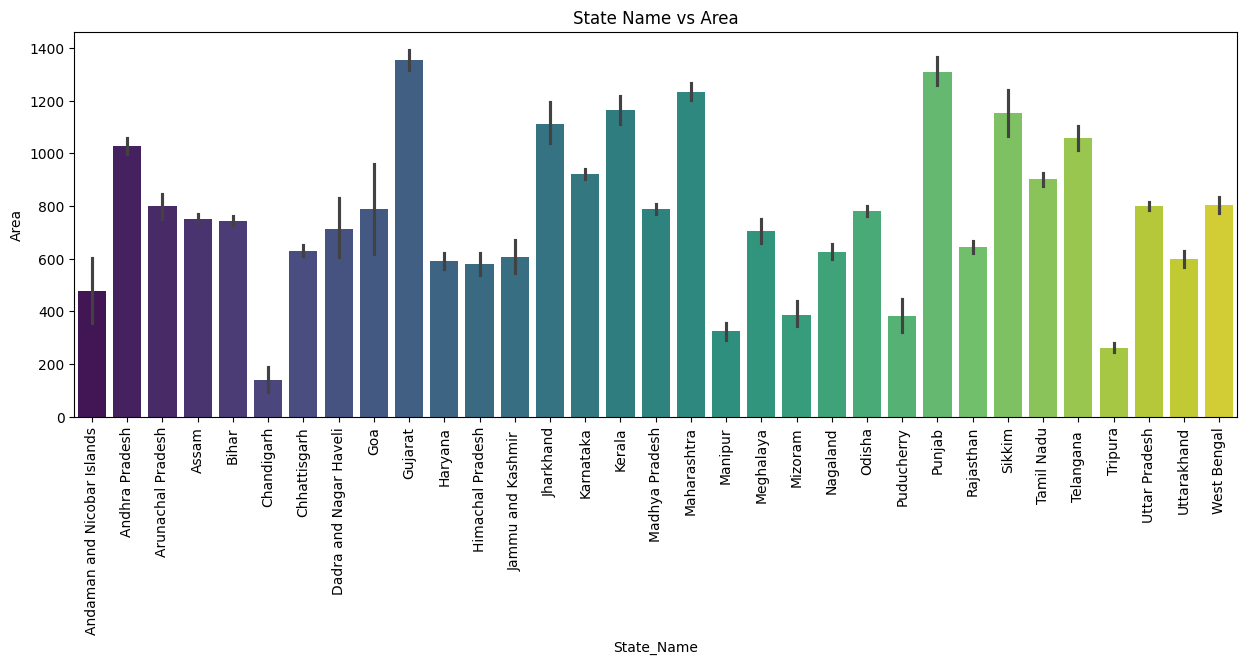

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(data=data2,x='State_Name',y='Area',palette='viridis')

plt.title('State Name vs Area')
plt.xticks(rotation=90)
plt.show()

Gujarat,Punjab,Maharashtra has the maximum number of agricultural land.<br>
Chandigarh has the lowest agricultural land.

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\587611636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2,x='Crop_Year',y='Production',palette='viridis')


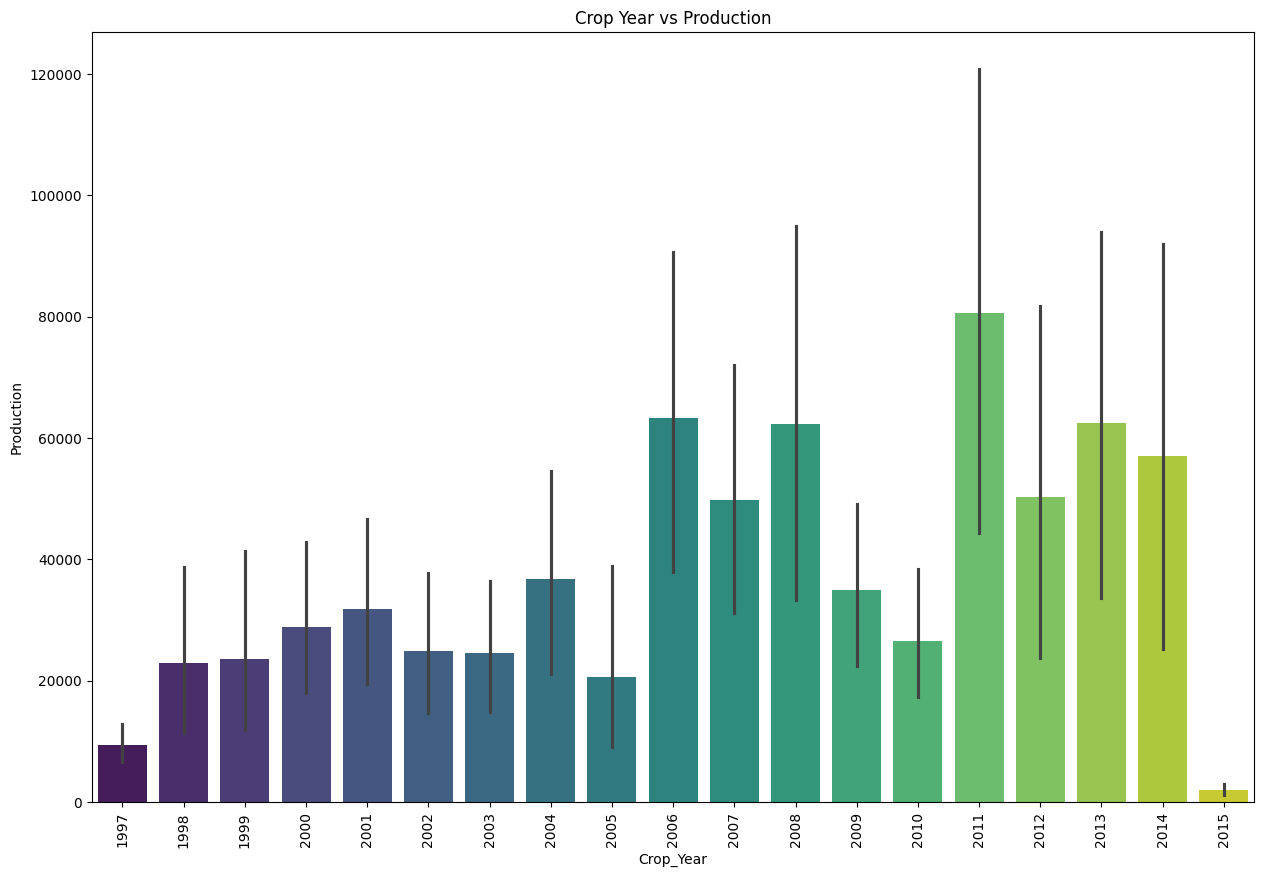

In [61]:
plt.figure(figsize=(15,10))
sns.barplot(data=data2,x='Crop_Year',y='Production',palette='viridis')

plt.title('Crop Year vs Production')
plt.xticks(rotation=90)
plt.show()

since 2006 there is not much difference in crop production except 2015.

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\79271663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2,x='Crop_Year',y='Area',palette='viridis')


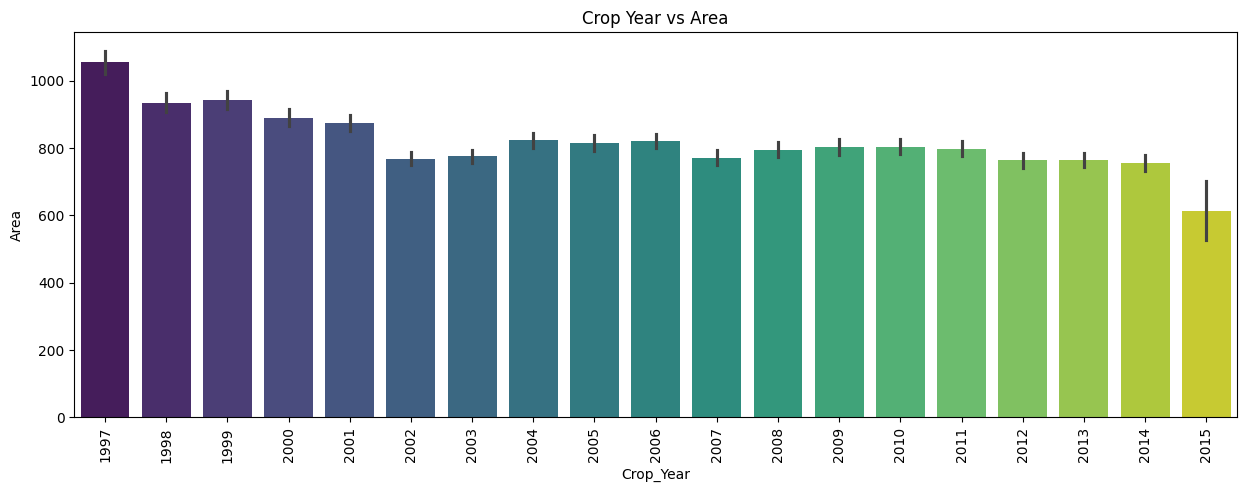

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(data=data2,x='Crop_Year',y='Area',palette='viridis')

plt.title('Crop Year vs Area')
plt.xticks(rotation=90)
plt.show()

from 1997 to 2015 there is decrease agricultural area.

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\2983995763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2,x='Season',y='Area',palette='viridis')


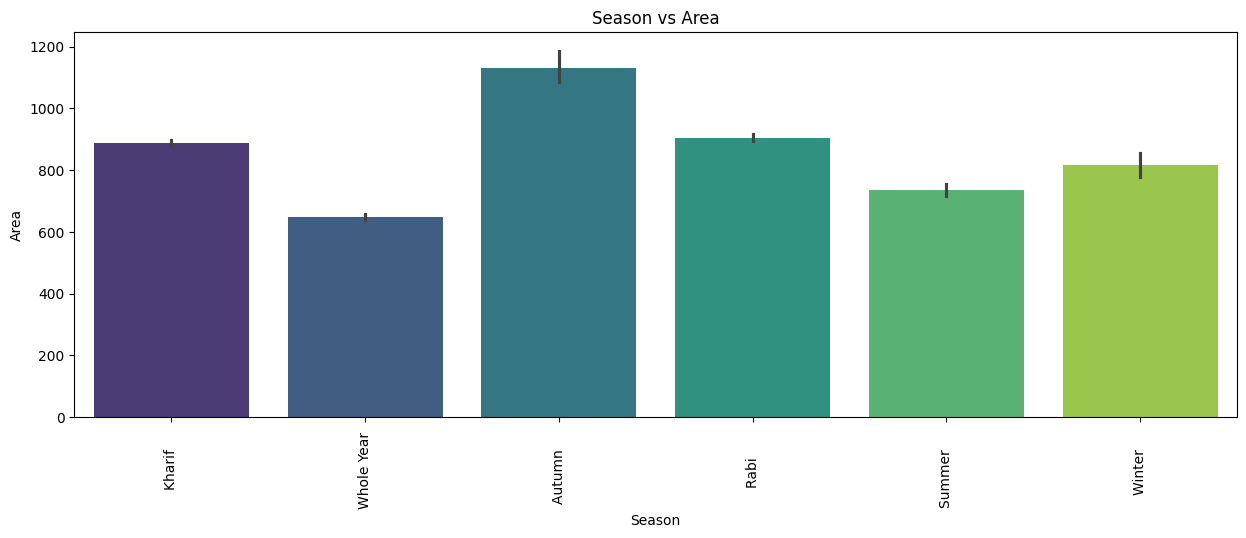

In [63]:
plt.figure(figsize=(15,5))
sns.barplot(data=data2,x='Season',y='Area',palette='viridis')

plt.title('Season vs Area')
plt.xticks(rotation=90)
plt.show()

The agricultural area is maximum in 'Autumn'.

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\1915934809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2,x='Season',y='Production',palette='viridis')


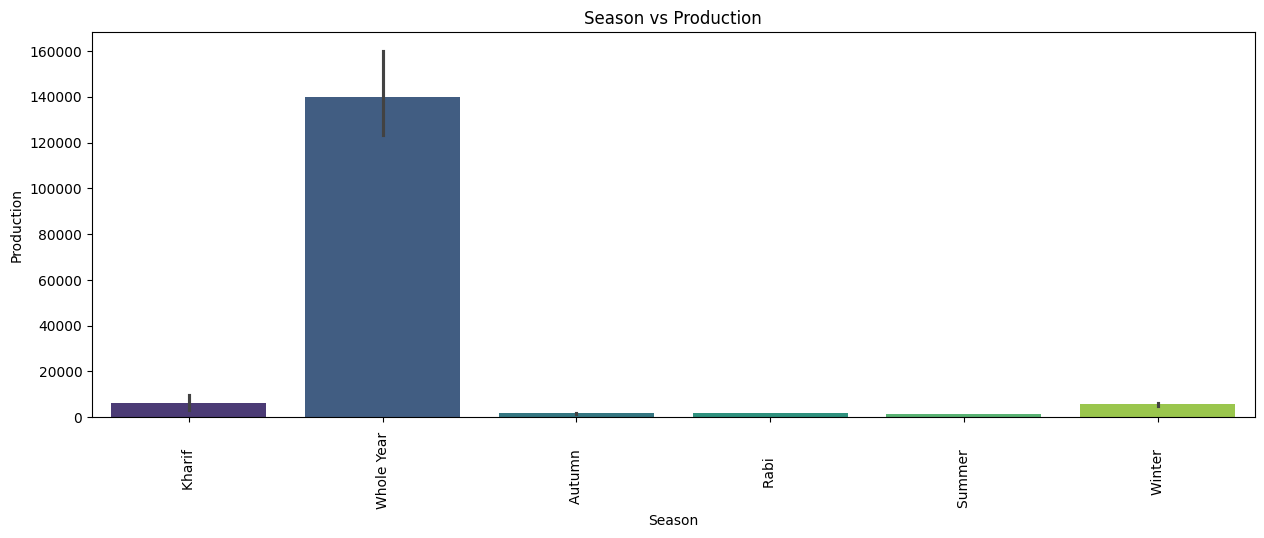

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(data=data2,x='Season',y='Production',palette='viridis')

plt.title('Season vs Production')
plt.xticks(rotation=90)
plt.show()

Production is maximumm in whole year.

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\1057562522.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2,x='Crop',y='Production',palette='viridis')


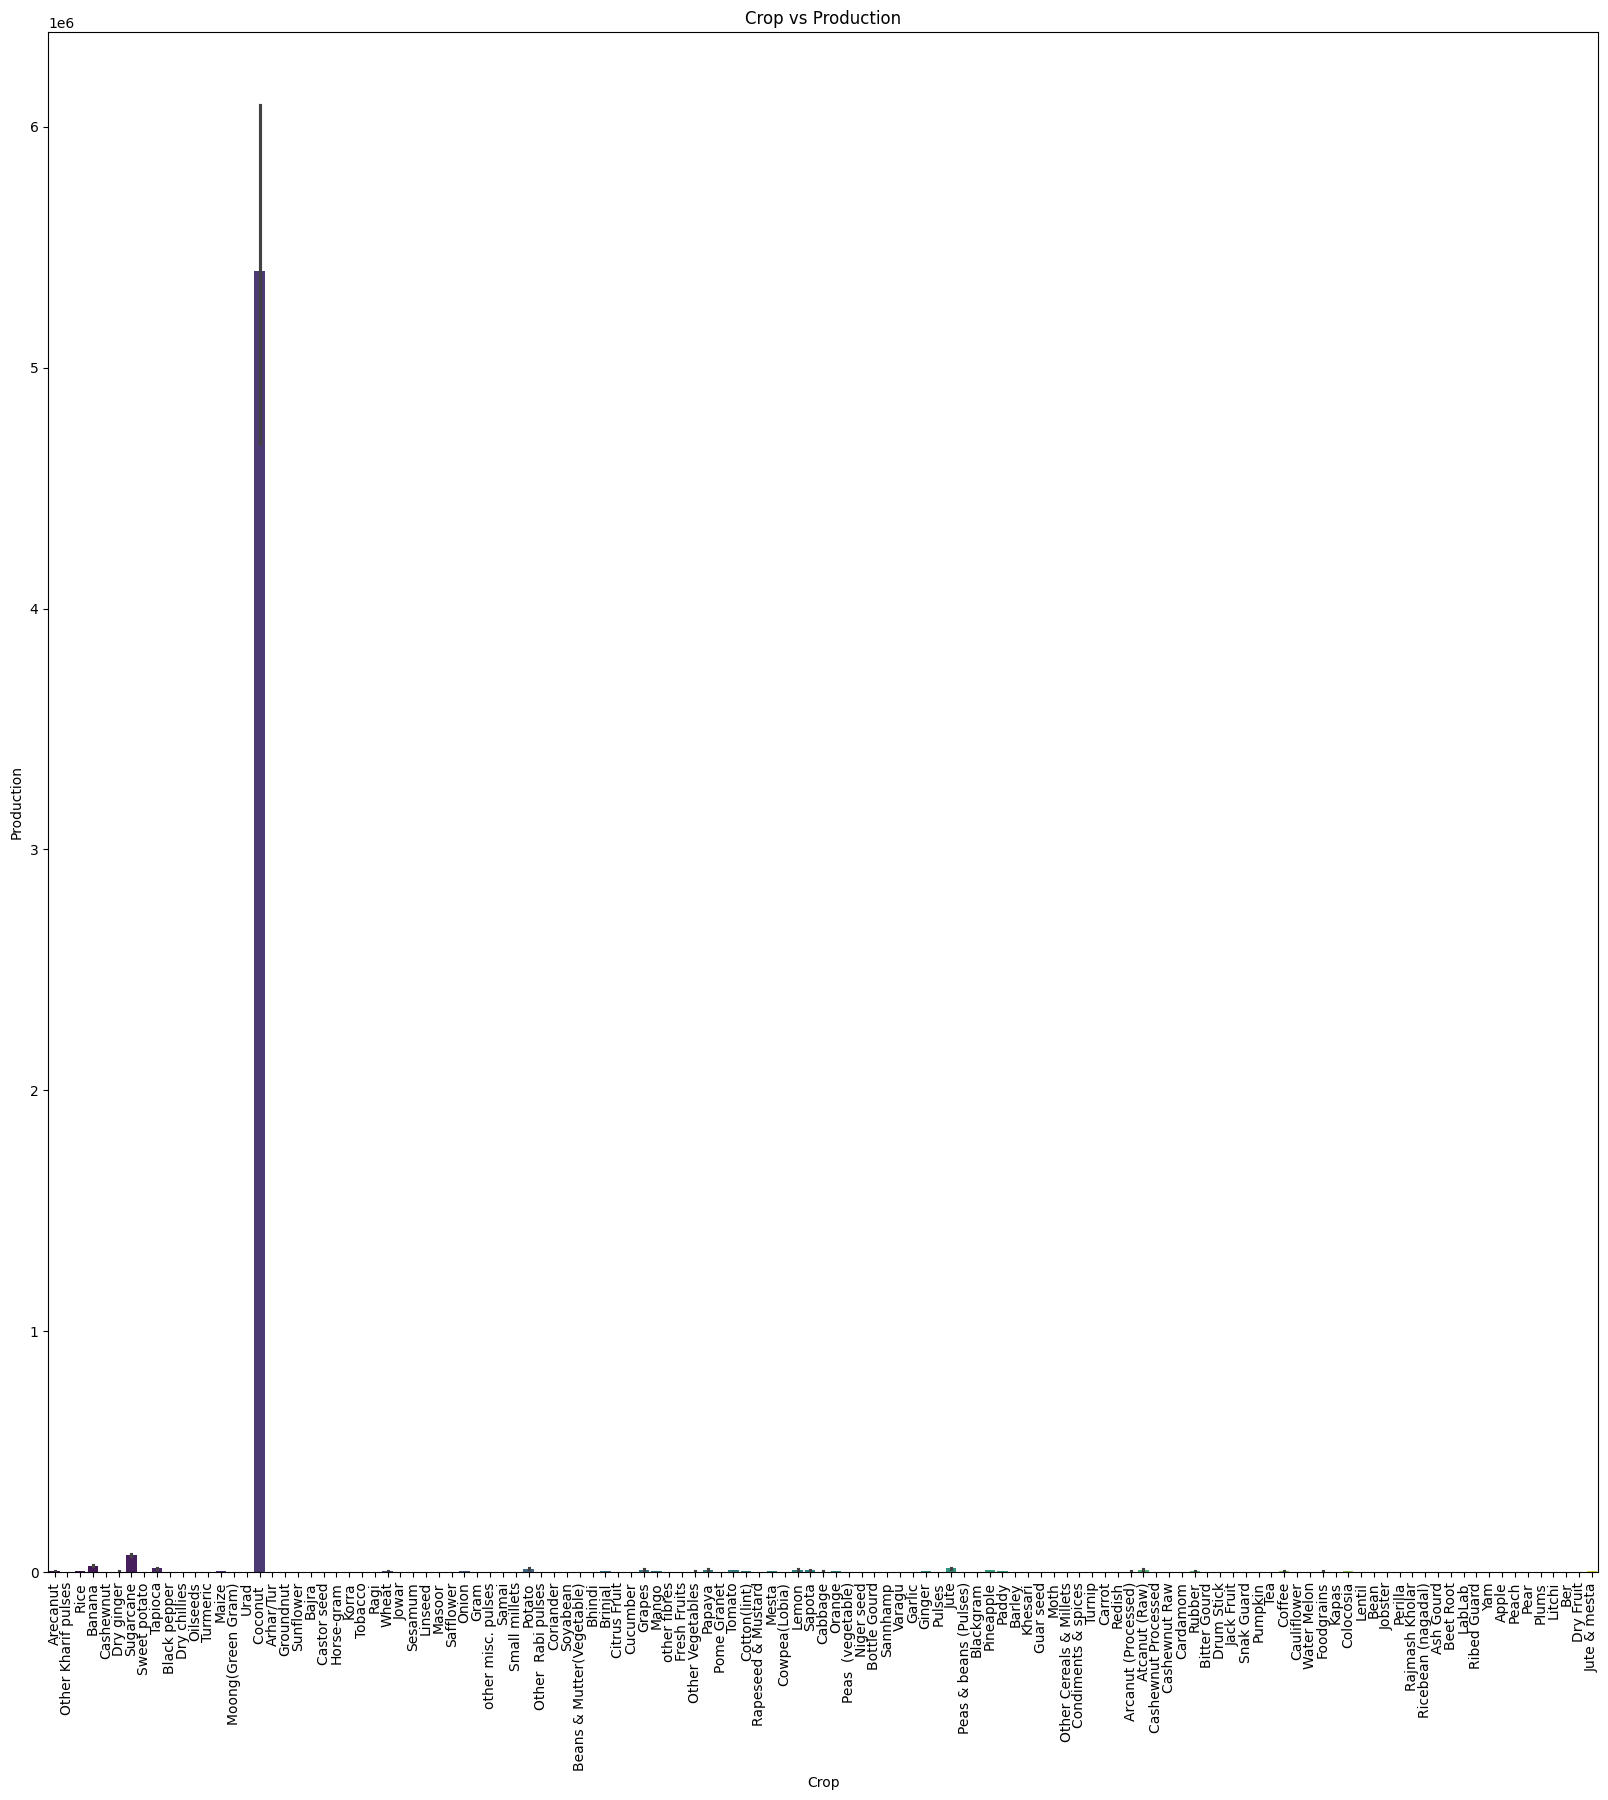

In [65]:
plt.figure(figsize=(20,20))
sns.barplot(data=data2,x='Crop',y='Production',palette='viridis')

plt.title('Crop vs Production')
plt.xticks(rotation=90)
plt.show()

production of coconut is maximum.

C:\Users\Hp\AppData\Local\Temp\ipykernel_2908\3819971680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2,x='Crop',y='Area',palette='viridis')


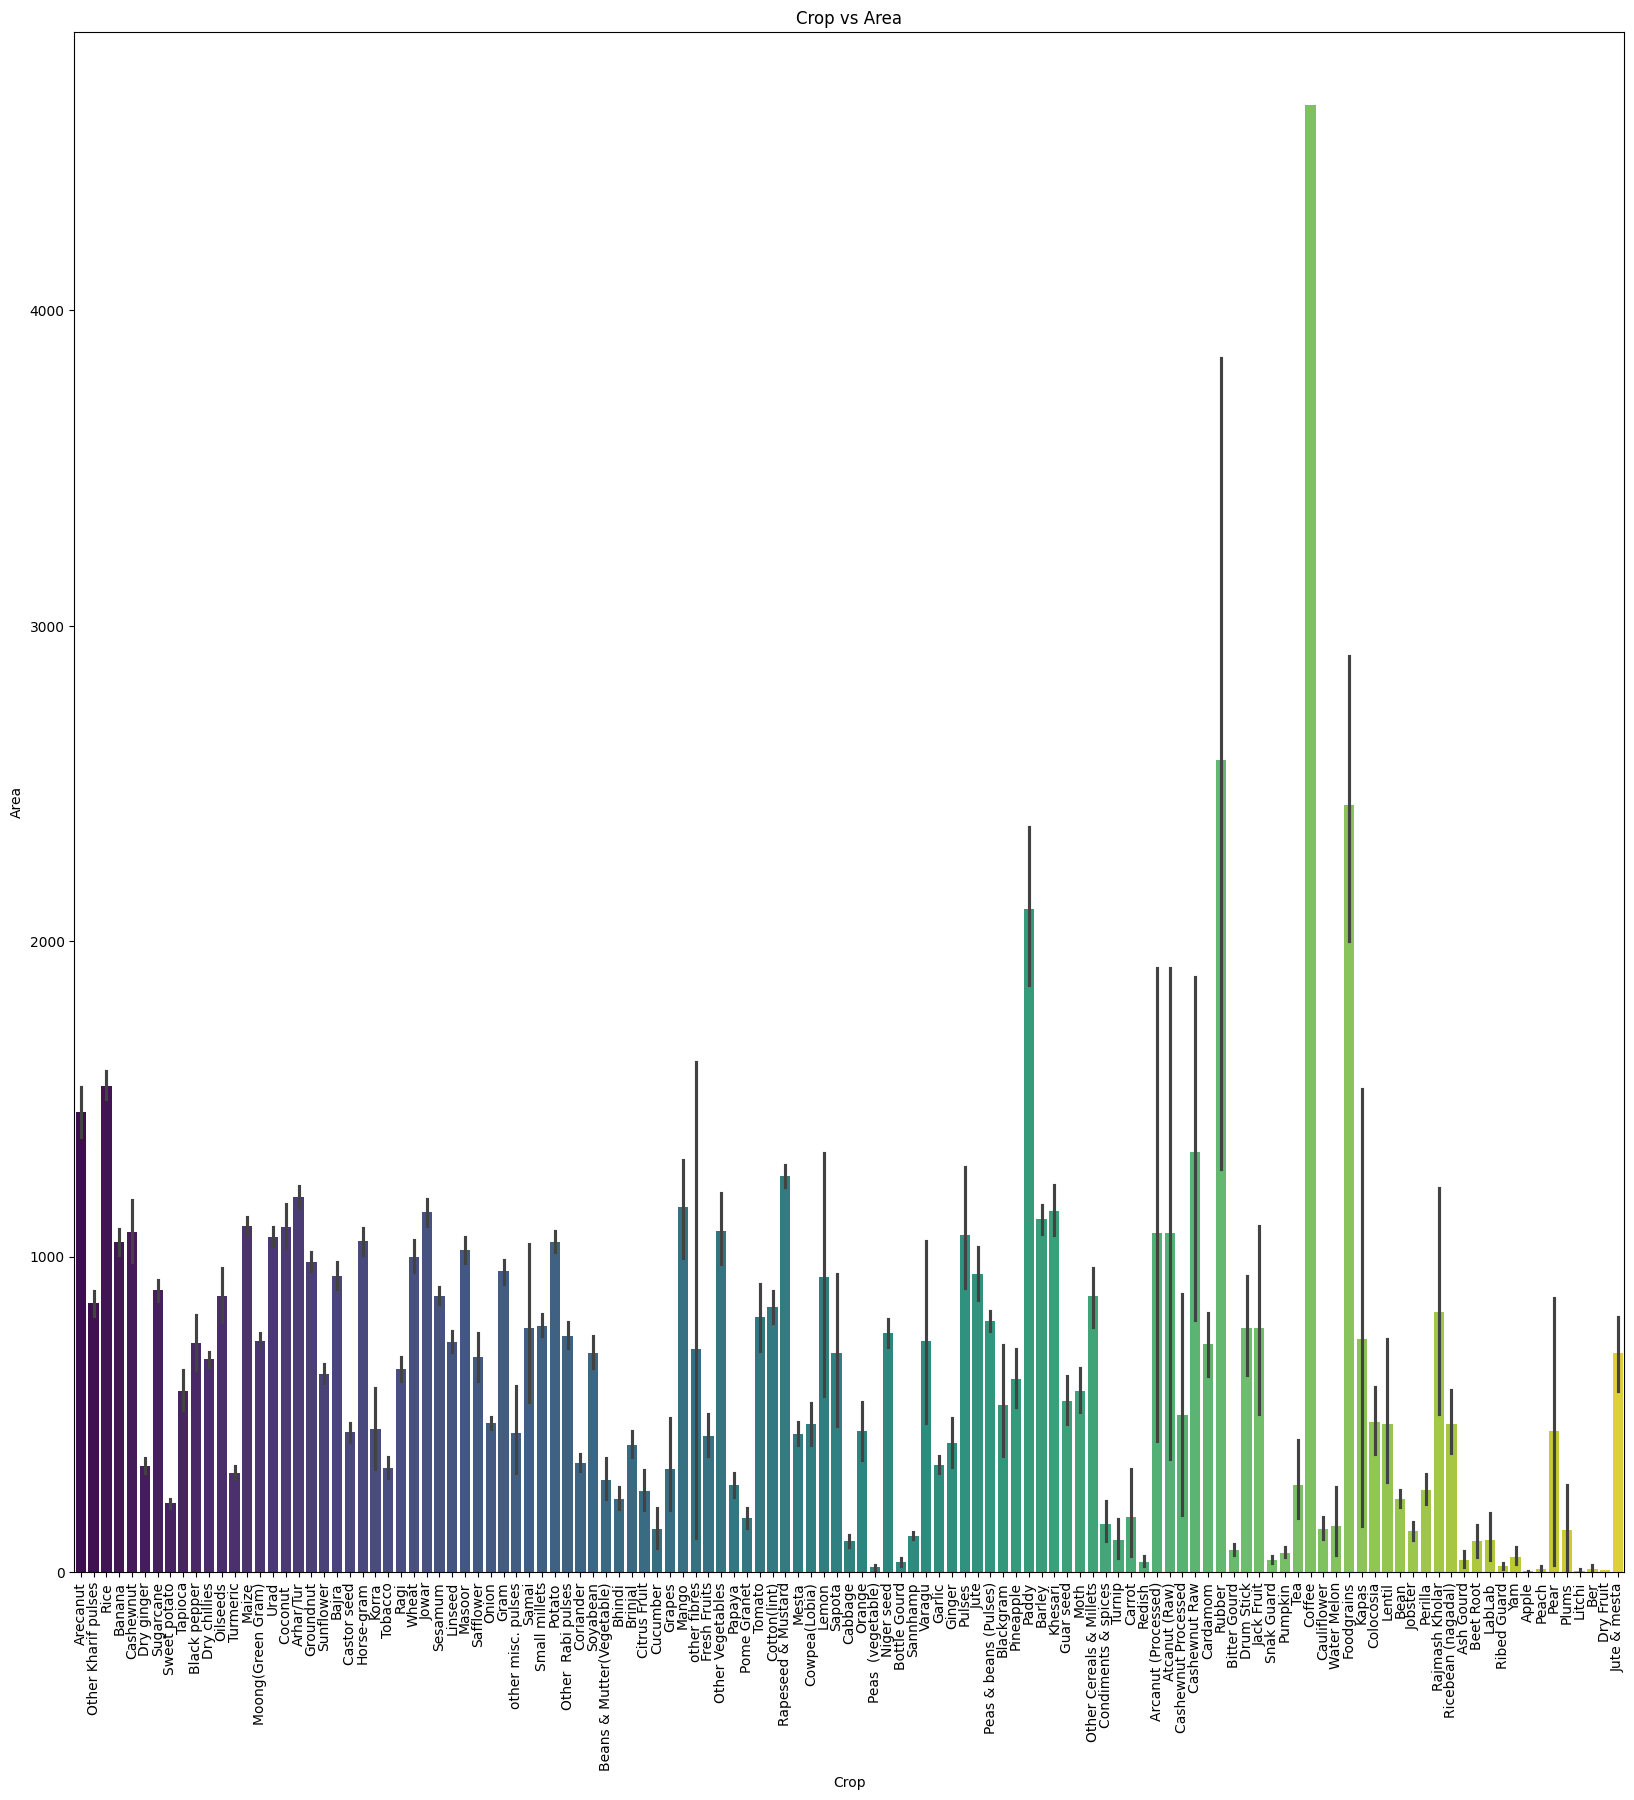

In [66]:
plt.figure(figsize=(20,20))
sns.barplot(data=data2,x='Crop',y='Area',palette='viridis')

plt.title('Crop vs Area')
plt.xticks(rotation=90)
plt.show()

Area of coffee is maximum.

<Axes: xlabel='Production', ylabel='Area'>

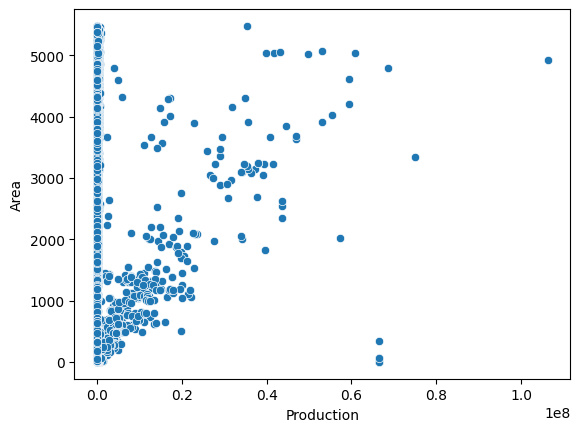

In [67]:
sns.scatterplot(data=data2,x='Production',y='Area')

Production is corelated with Agricultural Area.

##### Season wise yearly production

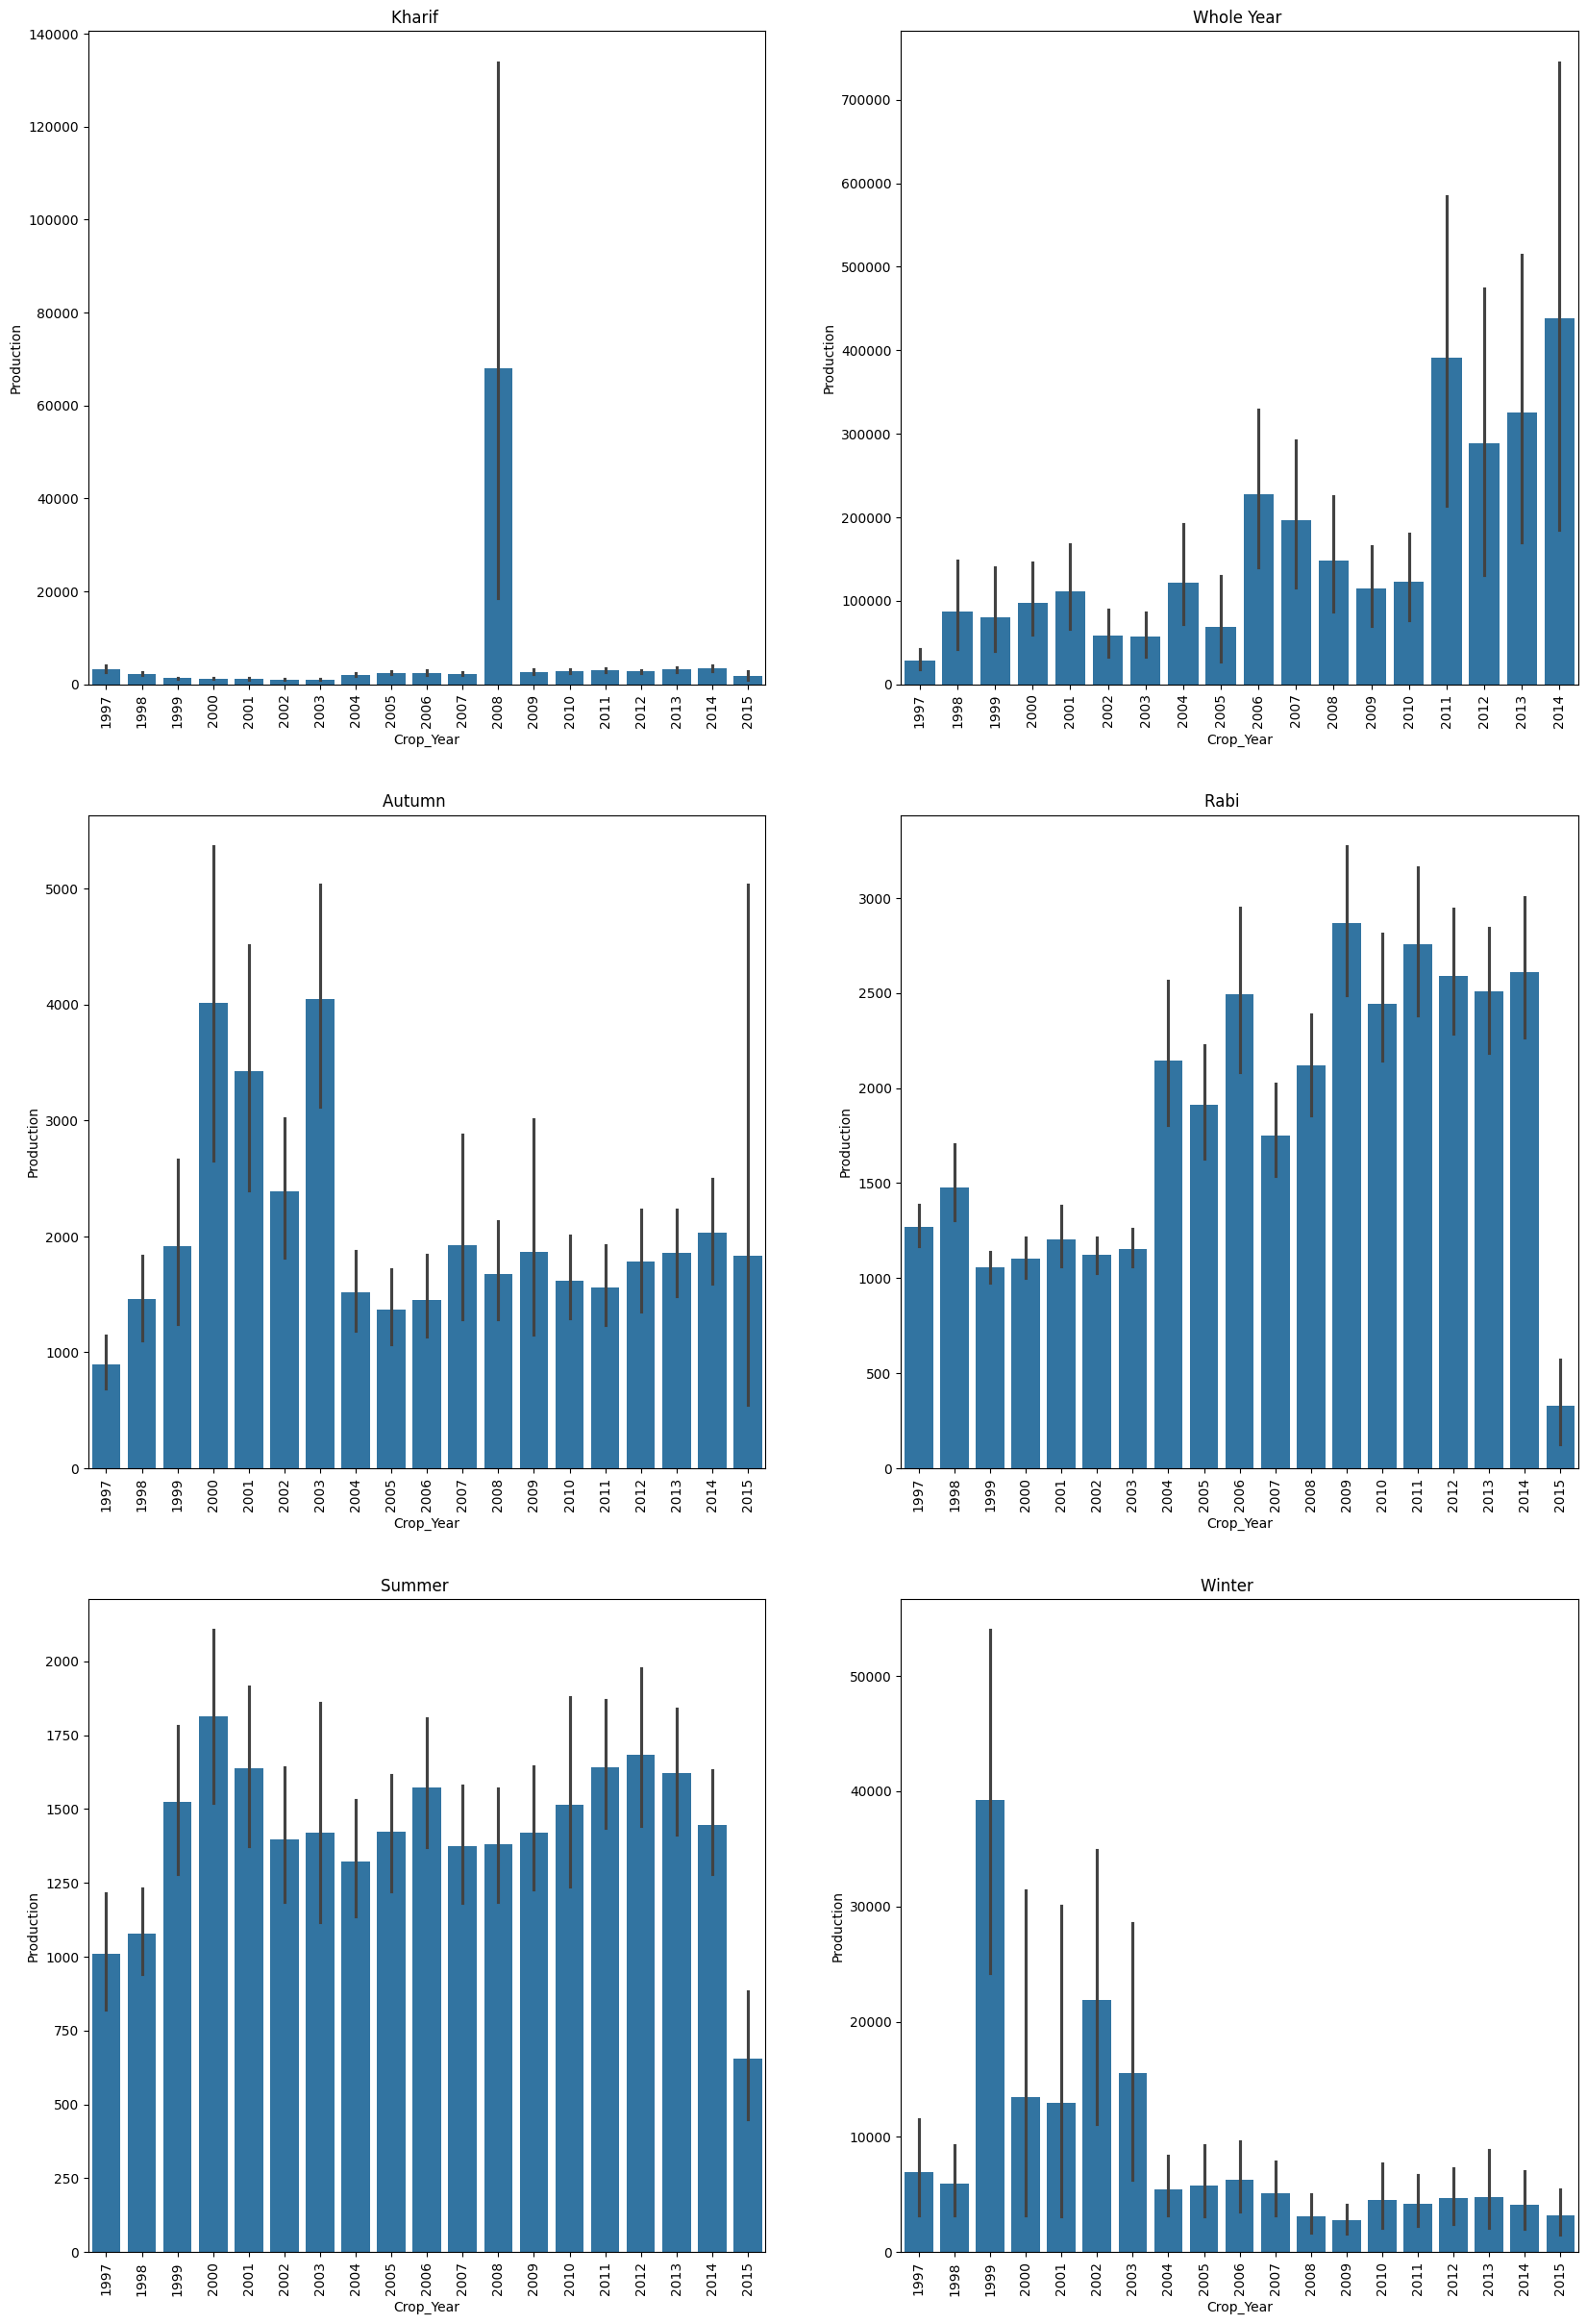

In [70]:
plt.figure(figsize=(20,30))
count=1
for i in data2['Season'].unique():
    plt.subplot(3,2,count)
    sns.barplot(data=data2[data2['Season']==i],x='Crop_Year',y='Production')
    plt.xticks(rotation=90)
    plt.title(i)
    count+=1

during Kharif season of 2008 has the maximum production.<br>
winter crops production is decreasing and same trend has been observed in autumn.

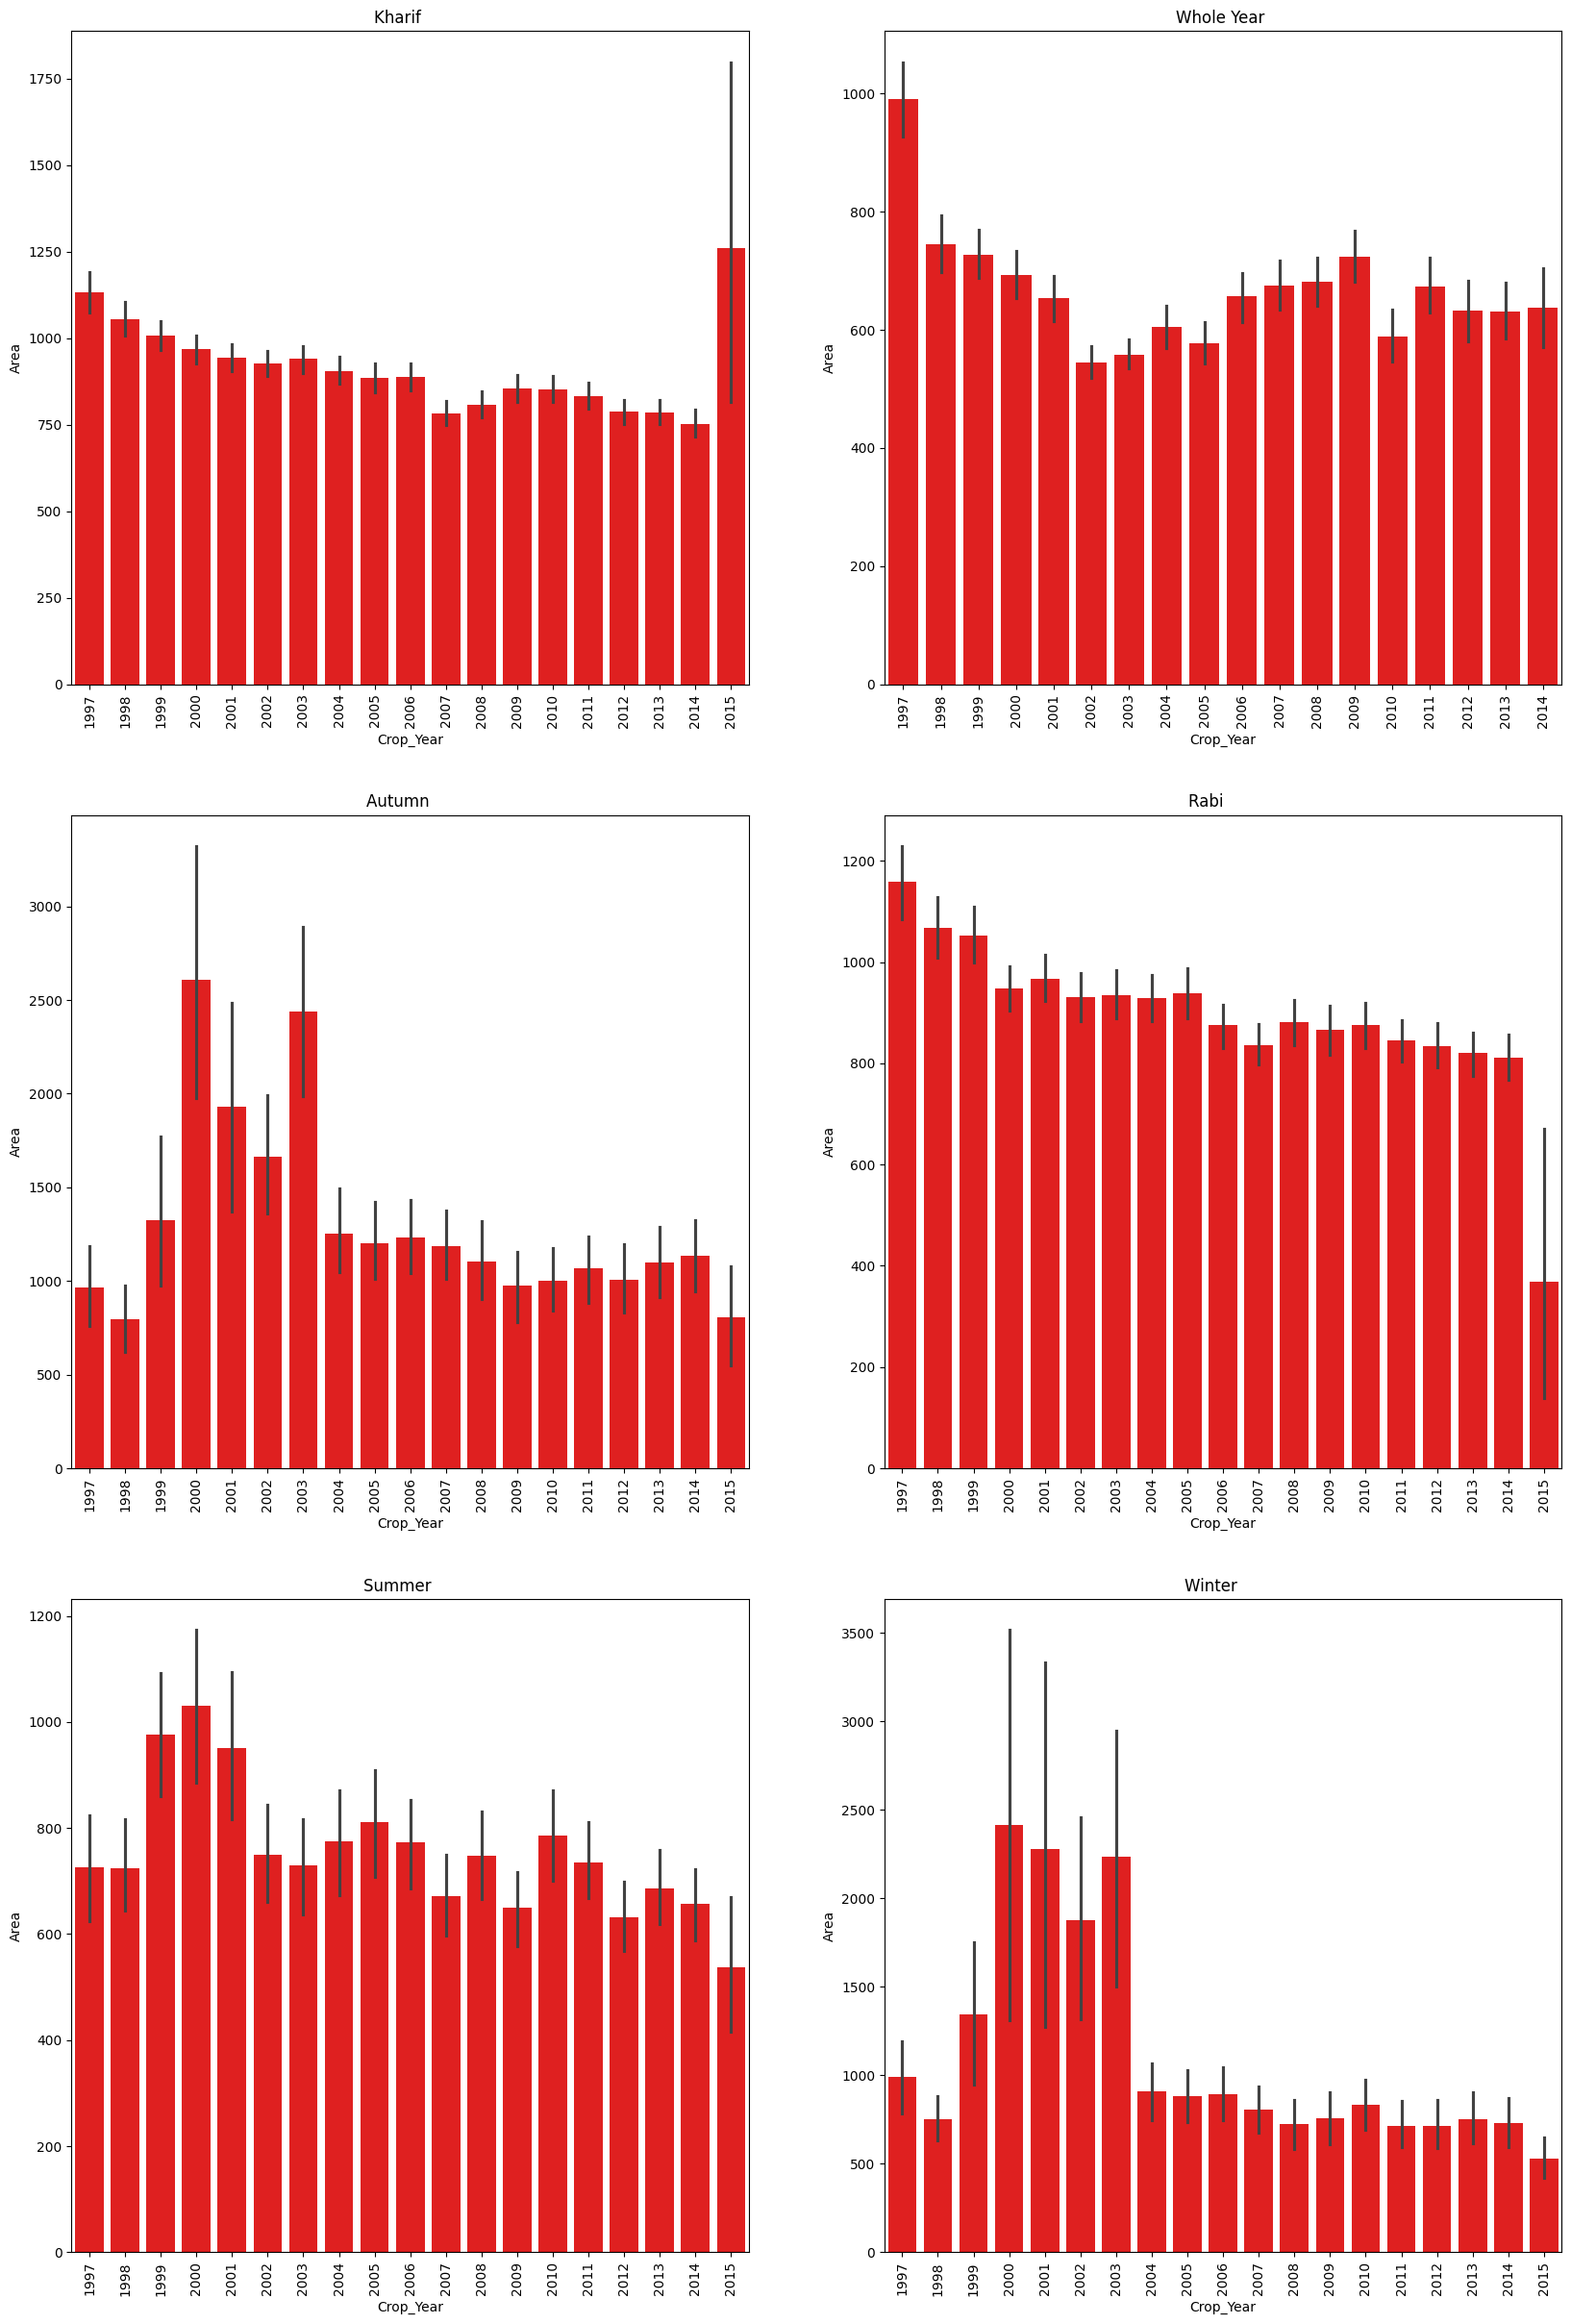

In [71]:
plt.figure(figsize=(20,30))
count=1
for i in data2['Season'].unique():
    plt.subplot(3,2,count)
    sns.barplot(data=data2[data2['Season']==i],x='Crop_Year',y='Area',color='red')
    plt.xticks(rotation=90)
    plt.title(i)
    count+=1

Rabi and kharif agricultural land is decresing by the years.<br>
similar but slow trend has been observed in other seasons

#### Summary
* The Dataset given was about the Production of Crops from the year 1997 to 2015
* Univate Analysis:
    * The agricultural area is Maximum in "Autumn"
    * The States Punjab, Maharashtra, Gujarat has maximumn number of Agricutural land among all the states.
    * Chandigarh has lowest number of agricultural land.
    * The District Bilaspur has maximum count, i.e it has maximum crop production.
    * Mumbai has lowest count, i.e it has lowest crop production.
    * Maize has maximum count.
    * Coffee has lowest count.
    * The data of Production and Arae highly skweed .
    * This is maybe beacuse that every state has varying number of agricultural land.
    * Every State produce diffrent crops in abundance.
    * The Procudtion is maximum in Whole Year.
* Bivariate Analysis
    * During Kharif season the in 2008 there was maximum production
    * Winter crops production is decreasing and same trend has been observed in autumn.
    * Whole year crop does not have vast diffrence.
    * Rabi and kharif agricultural land is decresing by the years.
    * similar but slow trend has been observed in other seasons.
    * Production is corretated with agricultural area.

* The Production and Quality of Land for the agricultural is affected by the year
* Hence we need to take necessary measure to ensure that the production increase by the year